In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter


In [2]:
# plot 3-panel figure for 2015 and 2030 - sectoral emissions and tech deployment

In [ ]:
#1 sectoral emissions 2015 and 2030
#Sectoral

# calculation
Sec_stick=pd.read_csv("1003_CO2_sector_stick_20240822_80p.csv")
Sec_2030_nl=pd.read_csv("1003_CO2_sector_crt2030_80p_nl_0821.csv")
Sec_2030_l=pd.read_csv("1003_CO2_sector_crt2030_80p_l_0821.csv")
Sec_2040_nl=pd.read_csv("1003_CO2_sector_crt2040_80p_nl_0821.csv")
Sec_2040_l=pd.read_csv("1003_CO2_sector_crt2040_80p_l_0821.csv")
# Sec_CS['Sector_B']=[]
def sectoralallocation(x):
    
    SEC=[]
    for sec in x['sector']:

        if sec in ["backup_electricity" ,"N fertilizer", "cement" ,     "H2 central production" ,    "H2 wholesale dispensing" ,  "other industrial energy use" , "other industrial feedstocks" , "process heat cement"] :
            SEC.append("industry")
        elif sec in ["csp_backup", "base load generation",  "intermediate generation",  "peak generation","subpeak generation"]:
            SEC.append("power")
        elif sec in ["comm cooking" , "comm cooling" , "comm heating", "comm hot water", "comm other", "resid clothes dryers", "resid cooking" ,
                     "resid heating","resid hot water" , "resid other"]:
            SEC.append("residential commercial")
        elif "trn_" in sec:
#         elif sec.contains("trn_"):
            SEC.append("transportation")
        elif sec in ['biomass liquids', 'regional biomassOil' , "gas pipeline" ,"gas processing" , "oil refining" ,'regional corn for ethanol',"coal to liquids" ,"gas to liquids" , 'regional biomass','delivered biomass' ]:
            SEC.append("refinery")#highlight regional biomass(Oil)
        elif sec in ["airCO2","process heat dac"]:
            SEC.append("DAC")


        else:
            SEC.append("???")
            print(sec)
            continue
    x['Sector_B']=SEC

#     Allsecs=["agriculture","industry","power","residential commercial","transportation","DAC"]
    Allsecs=["industry","power","residential commercial","transportation","refinery","DAC"]


    SectoralE = []
    for sec in Allsecs:
        sector_e = []
        e2005 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2005),'co2.emiss'].sum()
        e2015 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2015),'co2.emiss'].sum()
        e2020 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2020),'co2.emiss'].sum()
        e2025 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2025),'co2.emiss'].sum()
    #         e2025 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2025'].sum()
        e2030 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2030),'co2.emiss'].sum()
        e2035 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2035),'co2.emiss'].sum()
        e2040 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2040),'co2.emiss'].sum()
    #         e2040 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2040'].sum()
    #         e2045 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2045'].sum()
        e2050 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2050),'co2.emiss'].sum()
        e2045 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2045),'co2.emiss'].sum()
        sector_e.append(e2005)
        sector_e.append(e2015)
        sector_e.append(e2020)
        sector_e.append(e2025)
        sector_e.append(e2030)
        sector_e.append(e2035)
        
    #         sector_e.append(e2040)
    #         sector_e.append(e2045)
        sector_e.append(e2040)
        sector_e.append(e2045)
        sector_e.append(e2050)
        
        SectoralE.append(sector_e)

        # print(SectoralE)
    row_names = Allsecs

    col_names = ['2005','2015', '2020','2025','2030','2035', '2040','2045','2050']
    SectoralE_df = pd.DataFrame(SectoralE, index=row_names, columns=col_names)

    scale = 44/12

    SectoralE_df = SectoralE_df.applymap(lambda x: x * scale if isinstance(x, (int, float)) else x)




    return(SectoralE_df)


all_files = [Sec_stick, Sec_2030_nl, Sec_2040_nl,Sec_2030_l, Sec_2040_l  ]
all_names = ['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick', 'Carrot_EarlyStick_Innovation','Carrot_LateStick_Innovation' ]

sec2015 = pd.DataFrame(columns=all_names)
sec2020 = pd.DataFrame(columns=all_names)
sec2025 = pd.DataFrame(columns=all_names)
sec2030 = pd.DataFrame(columns=all_names)

sec2035 = pd.DataFrame(columns=all_names)
sec2050 = pd.DataFrame(columns=all_names)

sec2040 = pd.DataFrame(columns=all_names)
sec2045 = pd.DataFrame(columns=all_names)



for i in range(len(all_files)):
    file=all_files[i]
#     print(file)
    
    name=all_names[i]
#     print(type(name))
    sec2015[name]=sectoralallocation(file)['2015']
    sec2020[name]=sectoralallocation(file)['2020']
    sec2025[name]=sectoralallocation(file)['2025']
    sec2030[name]=sectoralallocation(file)['2030']
    sec2035[name]=sectoralallocation(file)['2035']
    sec2050[name]=sectoralallocation(file)['2050']
    sec2040[name]=sectoralallocation(file)['2040']
    sec2045[name]=sectoralallocation(file)['2045']


Sec15v=sec2015.transpose()
Sec20v=sec2020.transpose()
Sec25v=sec2025.transpose()
Sec30v=sec2030.transpose()
Sec35v=sec2035.transpose()
Sec40v=sec2040.transpose()
Sec45v=sec2045.transpose()
Sec50v=sec2050.transpose()

Sec15v['year']='i2015'
Sec20v['year']='i2020'
Sec25v['year']='i2025'
Sec30v['year']='i2030'
Sec35v['year']='i2035'
Sec40v['year']='i2040'
Sec45v['year']='i2045'
Sec50v['year']='i2050'



Sec15v2=Sec15v.iloc[[0]]
combined_df = pd.concat([Sec15v, Sec20v, Sec25v, Sec30v, Sec35v, Sec40v, Sec45v, Sec50v])

#add agricaultural things here
luc=pd.read_excel("CO2_LUC_80p.xlsx", sheet_name="CO2")

luc2=luc.set_index('scenarios')
luc3 = luc2.drop(columns=['E2005','E2010'])
luc4=luc3.T
luc4.reindex()
luc2015 = luc4.loc['E2015']
luc2030 = luc4.loc['E2030']
luc2035 = luc4.loc['E2035']
luc2050 = luc4.loc['E2050']

combined_df4 = combined_df.copy()
row2015_2=combined_df4.loc[(combined_df4.index == 'Stick-only') & (combined_df4['year'].isin(['i2015']))]

row2035_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick', 
#                                                            'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation'
                                                    ])) & 
                                 (combined_df4['year'].isin(['i2035']))]

row2030_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 
#                                                        'Carrot_LateStick', 
#                                                            'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation'
                                                    ])) & 
                                 (combined_df4['year'].isin(['i2030']))]


row2050_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick', 
                                                           'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation'])) & 
                                 (combined_df4['year'].isin(['i2050']))]
row2050_2

row2015_2['land use']=luc2015[1]

row2030_2['land use'] = luc2035[[0,1,2]]

row2035_2['land use'] = luc2035[[0,1]]
row2050_2['land use'] = luc2050
row2035_2


colors4 = [#'#3cb44b',green for land use
    '#3d5a80',#dark blue, 
           "#90653A",#power
          
           
          '#98c1d9',# light blue, residential commercial
    
          #'#e0fbfc',#residential commercial
          '#f0c648',
           '#9a9a9a',
          '#293241',
    '#00a86b'#this is for beccs
          ]

Huilin4 = ListedColormap(colors4, name='my_colormap')



C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\937536371.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row2015_2['land use']=luc2015[1]
C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\937536371.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row2030_2['land use'] = luc2035[[0,1,2]]
C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\937536371.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x864 with 0 Axes>

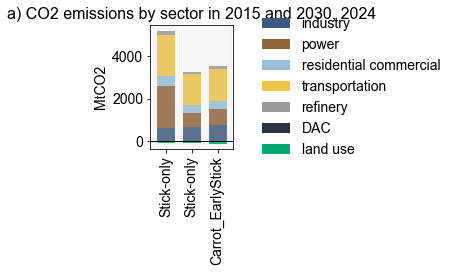

In [ ]:
#plotting code trial
# 设置全局字体为Arial
ax3 = plt.figure(figsize=(10, 12))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14


all_df_secem = pd.concat([row2015_2, row2030_2])


In [5]:
# panel 2 - power deployment

Gens=pd.read_excel("power_80p_0821.xlsx", sheet_name = "stick").iloc[:,:22]
Gen2030nl=pd.read_excel("power_80p_0821.xlsx", sheet_name = "crt2030_nl").iloc[:,:22]
Gen2030l=pd.read_excel("power_80p_0821.xlsx", sheet_name = "crt2030_l").iloc[:,:22]
Gen2040nl=pd.read_excel("power_80p_0821.xlsx", sheet_name = "crt2040_nl").iloc[:,:22]
Gen2040l=pd.read_excel("power_80p_0821.xlsx", sheet_name = "crt2040_l").iloc[:,:22]

Gens = Gens[Gens['Sub2'].notna()]
Gen2030nl = Gen2030nl[Gen2030nl['Sub2'].notna()]
Gen2030l = Gen2030l[Gen2030l['Sub2'].notna()]
Gen2040nl = Gen2040nl[Gen2040nl['Sub2'].notna()]
Gen2040l = Gen2040l[Gen2040l['Sub2'].notna()]


desired_order = ['fossil w/o CCS',
                 'wind','solar','others','biomass w/o CCS',
                 'fossil w/ CCS','biomass w/ CCS']
# Gen_plot=Gen[['i2015','i2035','i2050']]
def output(Gen):
    Gen_tech=Gen["Sub2"]
    current_new_tech=[]
    for i in range(len(Gen_tech)):
        tech = Gen_tech.iloc[i]
        if "CCS" in tech:
            if "biomass" in tech:
                current_new_tech.append("biomass w/ CCS")
            else:
                current_new_tech.append("fossil w/ CCS")

        elif "biomass" in tech:
            current_new_tech.append("biomass w/o CCS")
        elif "coal" in tech:
            current_new_tech.append("fossil w/o CCS")
        elif "gas" in tech:
            current_new_tech.append("fossil w/o CCS")
        elif "liquids" in tech:
            current_new_tech.append("fossil w/o CCS")
        elif "PV" in tech:
            current_new_tech.append("solar")
        elif "rooftop" in tech:
            current_new_tech.append("solar")
        elif "CSP" in tech:
            current_new_tech.append("solar")
        elif "wind" in tech:
            current_new_tech.append("wind")

        else:
            current_new_tech.append("others")#here it's nuclear, geothermal, and hydro
    #         print("not included_noCCS", tech)

    #         Gen_tech.extend(current_new_tech)  # Extend the new_tech list with the current_new_tech list

    Gen['broad_tech'] = current_new_tech


    Gen.set_index('broad_tech', inplace=True)


    GEN = Gen.groupby('broad_tech').sum()
    return(GEN)

G_s=output(Gens)
G_2030nl=output(Gen2030nl)
G_2030l=output(Gen2030l)
G_2040nl=output(Gen2040nl)
G_2040l=output(Gen2040l)

G_2030nl.reindex(desired_order)
G_2030l.reindex(desired_order)
G_2040nl.reindex(desired_order)
G_2040l.reindex(desired_order)
G_s.reindex(desired_order)

G_s['scenario']='Stick-only'
G_2030nl['scenario']='Carrot_EarlyStick'
G_2040nl['scenario']='Carrot_LateStick'
G_2030l['scenario']='Carrot_EarlyStick_Innovation'
G_2040l['scenario']='Carrot_LateStick_Innovation'

all_df=pd.concat([G_s, G_2030nl, G_2030l, G_2040nl
#                   , G_2040l
                 ], axis=0)
all_df
combined_df3 = all_df.copy()#.transpose()
combined_df3.reset_index(inplace=True)
combined_df3.rename(columns={'index': 'tech'}, inplace=True)

# combined_df3.reindex()
combined_df4 = combined_df3.pivot(index='scenario', columns='broad_tech', values='i2015')
# combined_df4

combined_df5 = combined_df3.pivot(index='scenario', columns='broad_tech', values='i2050')
# combined_df5

r50 = combined_df3[['i2050', 'scenario','broad_tech']]
r50 = r50.sort_values(by='broad_tech', key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))
r50 = r50.pivot(index = "scenario", columns = "broad_tech", values = "i2050")

# combined_df3=all_df.copy()
r2015 = combined_df3[['i2015', 'scenario','broad_tech']]
r15 = r2015[r2015['scenario'].isin(['Stick-only', '2030nl'])]
r15 = r15.sort_values(by='broad_tech', key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))
# r15.set_index('broad_tech', inplace=True)
# print(row2015)

r2035 = combined_df3[['i2035', 'scenario','broad_tech']]
r35 = r2035[r2035['scenario'].isin(['Stick-only', 'Carrot_EarlyStick','Carrot_EarlyStick_Innovation'])]
r35 = r35.sort_values(by='broad_tech', key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))
# r35.set_index('scenario', inplace=True)
# print(row2035)

r2030 = combined_df3[['i2030', 'scenario','broad_tech']]
r30 = r2030[r2030['scenario'].isin(['Stick-only', 'Carrot_EarlyStick'
#                                     ,'Carrot_EarlyStick_Innovation'
                                   ])]
r30 = r30.sort_values(by='broad_tech', key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))


r50 = combined_df3[['i2050', 'scenario','broad_tech']]
r50 = r50.sort_values(by='broad_tech', key=lambda x: pd.Categorical(x, categories=desired_order, ordered=True))
# r50.set_index('scenario', inplace=True)

r15 = r15.pivot(index = "scenario", columns = "broad_tech", values = 'i2015')
r30 = r30.pivot(index = "scenario", columns = "broad_tech", values = "i2030")
r50 = r50.pivot(index = "scenario", columns = "broad_tech", values = "i2050")

index35 = ['Stick-only', 'Carrot_EarlyStick','Carrot_EarlyStick_Innovation']
index30 = ['Stick-only', 'Carrot_EarlyStick']
index50 = ['Stick-only', 'Carrot_EarlyStick','Carrot_LateStick', 'Carrot_EarlyStick_Innovation'
#            ,'Carrot_LateStick_Innovation'
          ]
r15 = r15.reindex(columns=desired_order)
r35 = r35.reindex(index=index35,columns=desired_order)
r30 = r30.reindex(index=index30,columns=desired_order)

r50 = r50.reindex(index=index50, columns=desired_order)



GEN_HL = ["#7a4e28",#"#d01c2a","#25a9e0",# 3 undabated fossil
          "#0096C7","#FFE900",#wind and solar
          "grey",#others
         "#AFE1AF",  #"#E5A84B",#bio-noCCS
           #这俩颜色是PNNL的但是要改改，分别是nuclear和hydro"#ef8e27","#fdfa28",
           "#cd7f32",#fossil with CCS
#                             "#5DA39D",
# #            "#ad440c","#00931d",
#         "#dab4c7",
          "#008000",
          #"#84e7f9",  "#88c892"
                           ]


GEN_HL = ListedColormap(GEN_HL)

all_df_power = pd.concat([r15, r30])
all_df_power

E:\Anacoda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
E:\Anacoda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


broad_tech,fossil w/o CCS,wind,solar,others,biomass w/o CCS,fossil w/ CCS,biomass w/ CCS
scenario,,,,,,,
Stick-only,9.988728,0.694737,0.128281,3.960121,0.124584,0.000000,0.000000
Stick-only,5.271215,4.182411,3.028613,3.938696,0.132026,0.432144,0.122482
Carrot_EarlyStick,5.630125,5.962538,3.654190,3.694122,0.090735,0.276880,0.016647


In [ ]:
#panel 3 - trn

C_s=pd.read_excel("trn_service_20240821_allVin.xlsx", sheet_name = 'stick').iloc[:,:22]
C_2030nl=pd.read_excel("trn_service_20240821_allVin.xlsx", sheet_name = 'crt2030_nl').iloc[:,:22]
C_2030l=pd.read_excel("trn_service_20240821_allVin.xlsx", sheet_name = 'crt2030_l').iloc[:,:22]
C_2040nl=pd.read_excel("trn_service_20240821_allVin.xlsx", sheet_name = 'crt2040_nl').iloc[:,:22]
C_2040l=pd.read_excel("trn_service_20240821_allVin.xlsx", sheet_name = 'crt2040_l').iloc[:,:22]

C_s = C_s[C_s['subsector'] == 'Car']
C_2030nl = C_2030nl[C_2030nl['subsector'] == 'Car']
C_2030l = C_2030l[C_2030l['subsector'] == 'Car']
C_2040nl = C_2040nl[C_2040nl['subsector'] == 'Car']
C_2040l = C_2040l[C_2040l['subsector'] == 'Car']
trn_order=['Liquids','NG','Hybrid Liquids','BEV','FCEV']
C_2030nl = C_2030nl.groupby('input').sum()
C_2030nl = C_2030nl.sort_values(by='input', key=lambda x: pd.Categorical(x, categories=trn_order, ordered=True))
C_2030nl['scenario']='Carrot_EarlyStick'
C_2030l = C_2030l.groupby('input').sum()
C_2030l = C_2030l.sort_values(by='input', key=lambda x: pd.Categorical(x, categories=trn_order, ordered=True))
C_2030l['scenario']='Carrot_EarlyStick_Innovation'
C_2040nl = C_2040nl.groupby('input').sum()
C_2040nl = C_2040nl.sort_values(by='input', key=lambda x: pd.Categorical(x, categories=trn_order, ordered=True))
C_2040nl['scenario']='Carrot_LateStick'
C_2040l = C_2040l.groupby('input').sum()
C_2040l = C_2040l.sort_values(by='input', key=lambda x: pd.Categorical(x, categories=trn_order, ordered=True))
C_2040l['scenario']='Carrot_LateStick_Innovation'

C_s = C_s.groupby('input').sum()
C_s = C_s.sort_values(by='input', key=lambda x: pd.Categorical(x, categories=trn_order, ordered=True))
C_s['scenario']='Stick-only'

combined_2035=pd.concat([C_s,C_2030nl, C_2040nl], axis=0)
combined_2030=pd.concat([C_s,C_2030nl], axis=0)
combined_2050 = pd.concat([C_s, C_2030nl, C_2030l, C_2040nl], axis=0)
combined_2030

trn2015=C_s[['i2015','scenario']]
trn2035=combined_2035[['i2035','scenario']]
trn2030=combined_2030[['i2030','scenario']]
trn2050=combined_2050[['i2050','scenario']]

trn2050.reset_index(drop=False, inplace=True)
trn2035.reset_index(drop=False, inplace=True)
trn2030.reset_index(drop=False, inplace=True)
trn2015.reset_index(drop=False, inplace=True)

trn_2015 = trn2015.pivot(index='scenario', columns='input', values='i2015')
trn_2035 = trn2035.pivot(index='scenario', columns='input', values='i2035')
trn_2030 = trn2030.pivot(index='scenario', columns='input', values='i2030')
trn_2050 = trn2050.pivot(index='scenario', columns='input', values='i2050')


trn2015_reordered = trn_2015.reindex(index=index50, columns=trn_order)
trn2050_reordered = trn_2050.reindex(index=index50, columns=trn_order)
trn2035_reordered = trn_2035.reindex(index=index35, columns=trn_order)
trn2030_reordered = trn_2030.reindex(index=index30, columns=trn_order)
# trn2015_reordered = trn2015_reordered.loc['Stick-only']
trn2015_reordered = trn2015_reordered.iloc[0]

# panel 2 - figure trial
merged_df = pd.concat([trn_2015, trn2030_reordered, trn2050_reordered])
merged_df
GEN_HL_cars2 = [ '#2d97e1',    
    '#20b2aa',    
    '#ffc800',
    '#7a4e28',
    '#eead63',
    
]

GEN_HL_cars2 = ListedColormap(GEN_HL_cars2)

# now plot bioliquids vs fossil
rfs=pd.read_excel("refined_liquids_80p.xlsx", sheet_name = "stick")
rf2030nl = pd.read_excel("refined_liquids_80p.xlsx", sheet_name = "2030nl")
rf2030l = pd.read_excel("refined_liquids_80p.xlsx", sheet_name = "2030l")
rf2040nl = pd.read_excel("refined_liquids_80p.xlsx", sheet_name = "2040nl")
rf2040l = pd.read_excel("refined_liquids_80p.xlsx", sheet_name = "2040l")

all_rl = [rfs, rf2030nl,rf2040nl,  rf2030l,
#           rf2040l
         ]
scenarios = ["stick", "2030nl", "2040nl", "2030l"]
all_rl_n_2050 = []
all_rl_n_2035 = []
all_rl_n_2030 = []
all_percentage_2050 = []
all_percentage_2035 = []
all_percentage_2030 = []

trial_df = pd.DataFrame()

for df in all_rl:

    biomass_to_liquids_sum_2050 = df.loc[df['sector'] == 'biomass liquids', 'i2050'].sum()
    biomass_to_liquids_sum_2035 = df.loc[df['sector'] == 'biomass liquids', 'i2035'].sum()
    biomass_to_liquids_sum_2030 = df.loc[df['sector'] == 'biomass liquids', 'i2030'].sum()
    

    total_i2050_sum = df['i2050'].sum()
    total_i2035_sum = df['i2035'].sum()
    total_i2030_sum = df['i2030'].sum()
    biomass_to_liquids_percentage = (biomass_to_liquids_sum_2050 / total_i2050_sum) 
    biomass_to_liquids_percentage_2035 = (biomass_to_liquids_sum_2035 / total_i2035_sum)
    biomass_to_liquids_percentage_2030 = (biomass_to_liquids_sum_2030 / total_i2030_sum)
    all_percentage_2050.append(biomass_to_liquids_percentage)
    all_percentage_2035.append(biomass_to_liquids_percentage_2035)
    all_percentage_2030.append(biomass_to_liquids_percentage_2030)
    
# type(all_percentage)
all_perc_sce = pd.DataFrame()
all_perc_sce['scenario'] = ['Stick-only', 'Carrot_EarlyStick', 'Carrot_LateStick', 
                            'Carrot_EarlyStick_Innovation', 
#                             'Carrot_EarlyStick'
                           ]

all_perc_sce['bio2030'] = all_percentage_2030
all_perc_sce['bio2050'] = all_percentage_2050

clean = combined_2050[["i2015",'i2030',"i2050","scenario"]]
clean.reset_index(drop=False, inplace=True)


scenarios = ['Stick-only', 'Carrot_EarlyStick', 'Carrot_LateStick', 'Carrot_EarlyStick_Innovation']
all_bio = pd.DataFrame()
all_fossil = pd.DataFrame()
all_sce = []
for i in range(len(scenarios)):
    scenario = scenarios[i]
    all_sce.append(scenario)
    liquid_2015 = clean[(clean['input'] == 'Liquids')]['i2015'].values[0]
    liquid_2030 = clean[(clean['input'] == 'Liquids')]['i2030'].values[0]

    liquid_2050 = clean[(clean['input'] == 'Liquids')]['i2050'].values[0]

    bio_perc2030 = all_perc_sce[(all_perc_sce['scenario'] == scenario)]['bio2030'].values[0]
    bio_perc2050 = all_perc_sce[(all_perc_sce['scenario'] == scenario)]['bio2050'].values[0]
    bio_2030 = liquid_2030*bio_perc2030
    bio_2050 = liquid_2050*bio_perc2050
    bio_2015 = 0
    fossil2015 = liquid_2015 - bio_2015
    fossil2030 = liquid_2030 - bio_2030
    fossil2050 = liquid_2050 - bio_2050

    

    all_bio = all_bio.append({'input': "Bioliquids", 'i2015': bio_2015, 'i2030': bio_2030, 'i2050': bio_2050, 'scenario': scenario}, ignore_index=True)
    all_fossil = all_fossil.append({'input': "Fossil", 'i2015': fossil2015, 'i2030': fossil2030, 'i2050': fossil2050, 'scenario': scenario}, ignore_index=True)
    print("succeed, scenario:", scenario)
# all_bio

combined_df_trial = pd.concat([clean, all_bio, all_fossil], ignore_index=True)
combined_df = combined_df_trial[combined_df_trial['input'] != "Liquids"]


plt2015 = combined_df[(combined_df['scenario'] == 'Stick-only')][['scenario', 'input', 'i2015']]

plt
plt2050 = combined_df[(combined_df['scenario'].isin(['Stick-only', 'Carrot_EarlyStick', 'Carrot_LateStick', "Carrot_EarlyStick_Innovation"]))][['scenario', 'input', 'i2050']]

trn_all_2015 = plt2015.pivot(index='scenario', columns='input', values='i2015')
trn_all_2030 = plt2030.pivot(index='scenario', columns='input', values='i2030')
trn_all_2050 = plt2050.pivot(index='scenario', columns='input', values='i2050')

desired_order_input = ['Fossil', 'Bioliquids', 'Hybrid Liquids', 'BEV', "FCEV"]
desired_order_sce = ['Stick-only', 'Carrot_EarlyStick', 'Carrot_LateStick', 'Carrot_EarlyStick_Innovation']
desired_order_sce1 = ['Stick-only', 'Carrot_EarlyStick']

trn_all_2030_t1 = trn_all_2030.reindex(desired_order_sce1)
trn_all_2030_t2 = trn_all_2030_t1[desired_order_input]

trn_all_2050_t1 = trn_all_2050.reindex(desired_order_sce)
trn_all_2050_t2 = trn_all_2050_t1[desired_order_input]
# trn_all_2050_t2


merged_df2 = pd.concat([trn_all_2015, trn_all_2030_t1])

all_df_trn = merged_df2[desired_order_input]

GEN_HL3 = [ 
#     '#ffc800',#hybrid
           
    '#7a4e28',#fossil
    '#00a86b', #bioliquids, green
    '#eead63',#hybrid
    '#2d97e1',   #BEV 
           
    '#82caff',    #FCEV
]

GEN_HL3 = ListedColormap(GEN_HL3)


succeed, scenario: Stick-only
succeed, scenario: Carrot_EarlyStick
succeed, scenario: Carrot_LateStick
succeed, scenario: Carrot_EarlyStick_Innovation


20240821-works


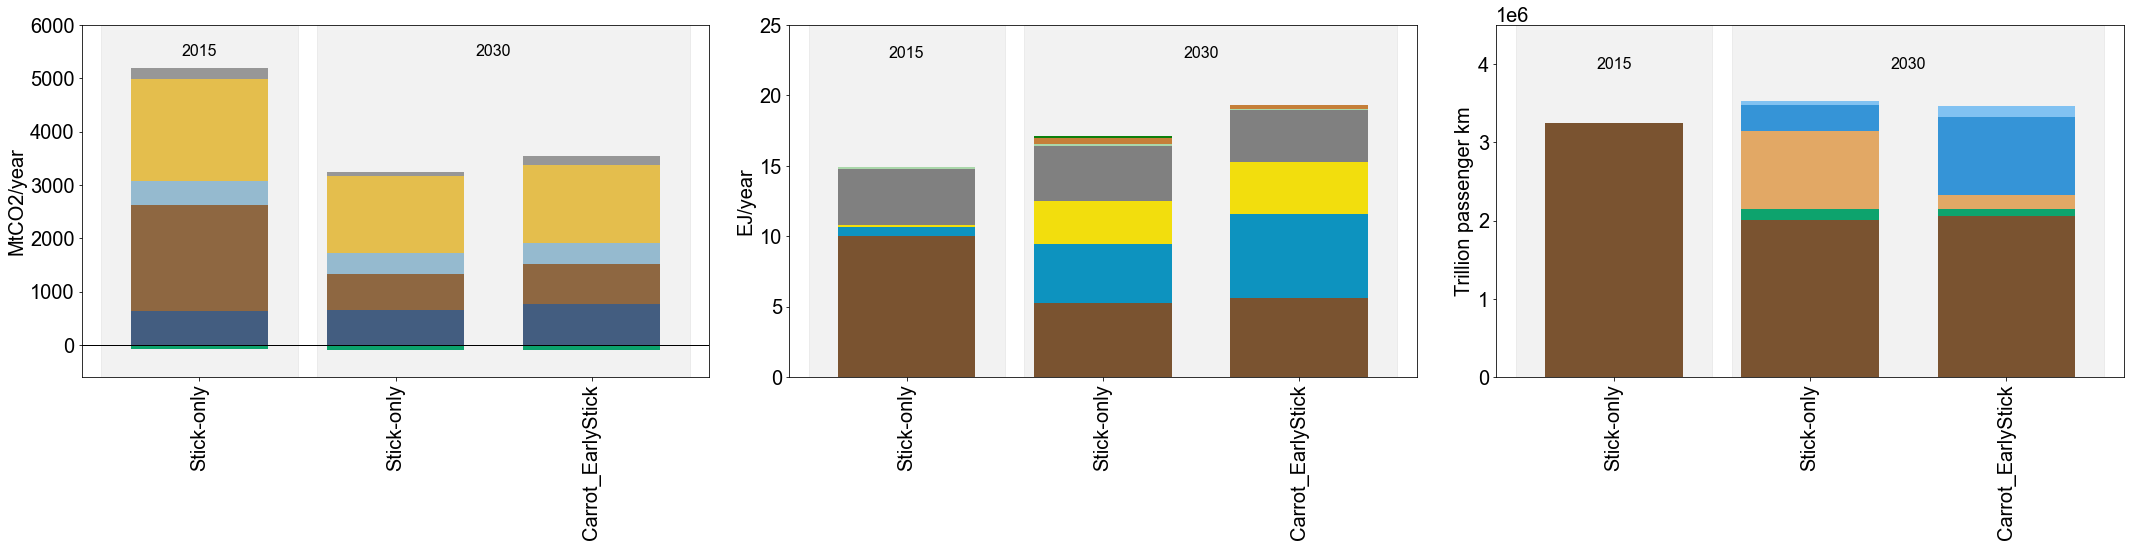

In [ ]:
# now do ao version with 2 panels

matplotlib.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 20
# fig, axs = plt.subplots(2, 3, figsize=(20, 6), sharey=True)
fig, axs = plt.subplots(1, 3, figsize=(30, 8), gridspec_kw={'width_ratios': [2, 2, 2]})

# r15.plot(kind='bar', stacked=True, ax=axs[0], cmap=GEN_HL, width=0.7)
all_df_secem.plot(kind='bar', stacked=True,  ax = axs[0], cmap=Huilin4, width=0.7)
all_df_power.plot(kind='bar', stacked=True, ax=axs[1], cmap=GEN_HL, width=0.7)
all_df_trn.plot(kind='bar', stacked=True, ax=axs[2], cmap=GEN_HL3, width=0.7)

ax0=axs[0]
ax1=axs[1]
ax2=axs[2]

ax0.set_ylim(-600, 6000)
ax1.set_ylim(0, 25)
ax2.set_ylim(0, 4500000)


axs[0].text(0, 5500, '2015', fontsize=16, ha='center', va='center', color='black')
axs[0].text(1.5, 5500, '2030', fontsize=16, ha='center', va='center', color='black')

axs[1].text(0, 23, '2015', fontsize=16, ha='center', va='center', color='black')
axs[1].text(1.5, 23, '2030', fontsize=16, ha='center', va='center', color='black')


axs[2].text(0, 4000000, '2015', fontsize=16, ha='center', va='center', color='black')
axs[2].text(1.5, 4000000, '2030', fontsize=16, ha='center', va='center', color='black')



for ax in axs.flat:
    ax.legend().remove()
    ax.set_xlabel('')
    ax.axhline(y=0, color='black', linewidth=1)

axs[0].set_ylabel('MtCO2/year')
axs[1].set_ylabel('EJ/year')
axs[2].set_ylabel('Trillion passenger km')

ax0.axvspan(-0.5, 0.5, color='gray', alpha=0.1)  
ax0.axvspan(0.6, 2.5, color='gray', alpha=0.1)  
ax1.axvspan(-0.5, 0.5, color='gray', alpha=0.1)  
ax1.axvspan(0.6, 2.5, color='gray', alpha=0.1) 
ax2.axvspan(-0.5, 0.5, color='gray', alpha=0.1)  
ax2.axvspan(0.6, 2.5, color='gray', alpha=0.1) 

# axs[-1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False,prop={'family': 'Arial', 'size': 14},ncol=1)
print("20240821-works")

plt.tight_layout()

# plt.savefig("Figure3_20241007_wide.svg", transparent = True)

# 显示图形
plt.show()

In [8]:
# now we need figure 4.
#panel 1 - tech cost changes

In [9]:
#figure 4 panel 2~4: innovation effects in 2050
#panel 2

In [10]:
# now let's do panel last - CO2 sequestration by tech
colors_pr = [#'#3cb44b',green for land use
    'green',
    'orange',
    '#6a4a3a',
    'grey'
          ]

# 创建自定义 colormap 对象
primary_cm = ListedColormap(colors_pr, name='my_colormap')
p_s = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='stick').iloc[:, :20]
p_2030nl = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2030_nl').iloc[:, :20]
p_2030l = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2030_l').iloc[:, :20]
p_2040nl = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2040_nl').iloc[:, :20]
p_2040l = pd.read_excel("CO2_seq_0821_80p.xlsx", sheet_name='crt2040_l').iloc[:, :20]

all_p=[p_s, p_2030nl, p_2030l, p_2040nl]

def ccs(df):
    all_p = df['technology'].unique()
    all_p_ff = df[(df['technology'].str.contains("coal")) |(df['technology'].str.contains("gas")) |
                 (df['technology'].str.contains("refined")) 
                 ]
    all_p_ff['type'] = 'Fossil CCS'
    all_p_cement = df[df['technology'].str.contains("cement")
                 ]
    all_p_cement['type'] = 'Others'
    all_p_bio = df[(df['technology'].str.contains("biomass")) |(df['technology'].str.contains("biofuels")) |
                 (df['technology'].str.contains("paper"))  |(df['technology'].str.contains("ethanol"))
                 ]
    all_p_bio['type'] = 'BECCS'
    all_p_dac = df[df['technology'].str.contains("DAC")
                 ]
    all_p_dac['type'] = 'DAC'
    # 合并数据
    all_df_pp = pd.concat([all_p_ff, all_p_cement, all_p_bio, all_p_dac])

    # 选择特定列
    all_df_pp2 = all_df_pp[['scenario', 'type', 'i2025', 'i2030', 'i2035', 'i2040', 'i2045', 'i2050']]

    # print(all_df_pp2)
    sum_by_type = all_df_pp2.groupby('type').sum()
    dfsss=sum_by_type.transpose()
    return(dfsss)

np_s=ccs(p_s)
np_2030nl = ccs(p_2030nl)
np_2030l = ccs(p_2030l)
np_2040nl = ccs(p_2040nl)
np_2040l = ccs(p_2040l)

np_s['scenario']='stick'
np_2030nl['scenario'] = '2030nl'
np_2030l['scenario'] ='2030l'
np_2040nl['scenario']='2040nl'

all_ccs1 = pd.concat([np_s, np_2030nl, np_2040nl, np_2030l])
all_ccs1

all_ccs3 = all_ccs1[all_ccs1.index == 'i2050'] 

all_ccs3 = all_ccs3.reset_index(drop=True)

all_ccs3 = all_ccs3.set_index('scenario')  
all_ccs3


C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\4010361308.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_ff['type'] = 'Fossil CCS'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\4010361308.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_p_cement['type'] = 'Others'
C:\Users\Huilin\AppData\Local\Temp\ipykernel_8976\4010361308.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

type,BECCS,DAC,Fossil CCS,Others
scenario,,,,
stick,234.274195,49.708683,255.426926,8.538469
2030nl,272.073392,74.866873,251.242786,7.963736
2040nl,484.741312,258.305513,290.885768,2.988190
2030l,152.046818,305.534437,316.910529,7.425480


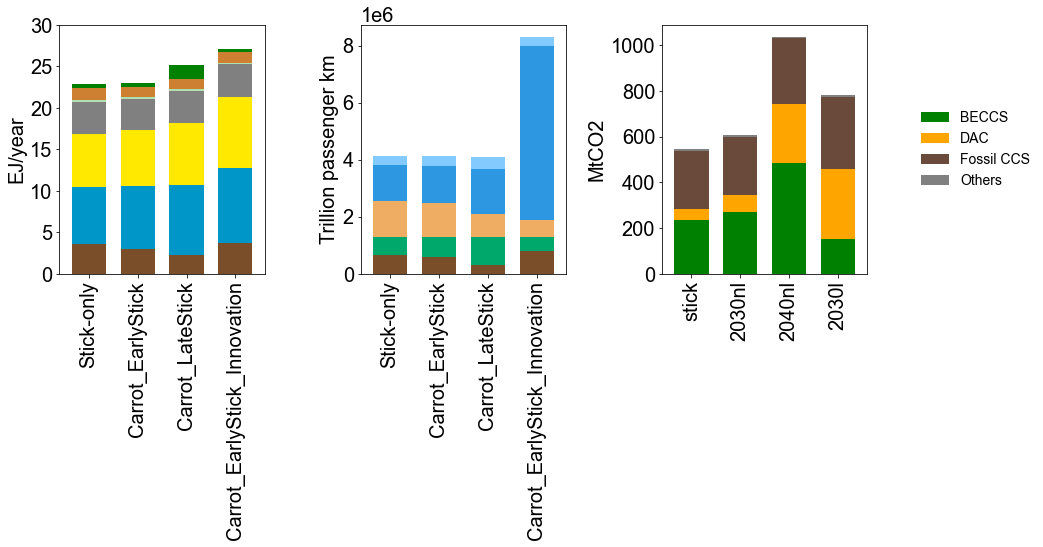

In [ ]:
# now 3 panels


matplotlib.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 20
# fig, axs = plt.subplots(2, 3, figsize=(20, 6), sharey=True)
fig, axs = plt.subplots(1, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1, 1]})

# r15.plot(kind='bar', stacked=True, ax=axs[0], cmap=GEN_HL, width=0.7)
# all_df_secem.plot(kind='bar', stacked=True,  ax = axs[0], cmap=Huilin4, width=0.7)
r50.plot(kind='bar', stacked=True, ax=axs[0], cmap=GEN_HL, width=0.7)
trn_all_2050_t2.plot(kind='bar', stacked=True, ax=axs[1], cmap=GEN_HL3, width=0.7)
all_ccs3.plot(kind='bar', stacked=True, ax=axs[2],cmap=primary_cm, width=0.7)

ax0=axs[0]
ax1=axs[1]
ax2=axs[2]

ax0.set_ylim(0, 30)
# ax1.set_ylim(0, 25)
# ax2.set_ylim(0, 4500000)

for ax in axs.flat:
    ax.legend().remove()
    ax.set_xlabel('')
    ax.axhline(y=0, color='black', linewidth=1)

axs[0].set_ylabel('EJ/year')
axs[1].set_ylabel('Trillion passenger km')
axs[2].set_ylabel('MtCO2')


axs[-1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False,prop={'family': 'Arial', 'size': 14},ncol=1)

plt.tight_layout()

# plt.savefig("Figure4_20240821.svg", transparent = True)

plt.show()

In [ ]:
# panel 1- costs
df=pd.read_excel("dac_costs_sim.xlsx", sheet_name = "Sheet1")
dacs2015=df.loc[df['scenario'] == 'stick', 'i2015']
dacs2050=df.loc[df['scenario'] == 'stick', 'i2050']

dacnl2015=df.loc[df['scenario'] == '2030nl', 'i2015']
dacnl2050=df.loc[df['scenario'] == '2030nl', 'i2050']

dacl2015=df.loc[df['scenario'] == '2030l', 'i2015']
dacl2050=df.loc[df['scenario'] == '2030l', 'i2050']

dacl2050=float(dacl2050.iloc[0])
dacl2015=float(dacl2015.iloc[0])
dacnl2050=float(dacnl2050.iloc[0])
dacnl2015=float(dacnl2015.iloc[0])
dacs2050=float(dacs2050.iloc[0])
dacs2015=float(dacs2015.iloc[0])


dacs_c = (dacs2050-dacs2015)/dacs2015
dacnl_c=(dacnl2050-dacnl2015)/dacnl2015
dacl_c=(dacl2050-dacl2015)/dacl2015

# solar costs
def SolarCostTech(scenario):
    filename = f"weighted costs power tech_{scenario}.xlsx"


    gen = pd.read_excel(filename, sheet_name = "generation", usecols=range(18))
    cost = pd.read_excel(filename, sheet_name = "costs", usecols=range(18))

    gen = gen.dropna(subset=['sub2'])
    cost = cost.dropna(subset=['sub2'])
    gen_gas = gen[gen['sub2'].str.contains("base")]
    gen_solar = gen[gen['sub2'].str.contains("subpeak")]
    cost_gas = cost[cost['sector'] == 'base load generation' ]
    cost_solar = cost[cost['sector'] == 'subpeak generation']


    solar_gen = gen_solar[gen_solar['sub2'].str.contains("PV")
    #                           | gen['subsector'].str.contains("PV")
                         ]
    solar_gen
    # region_solar_gen = solar_gen.groupby('region').sum()
    solar_cost = cost_solar[cost_solar['sub2'].str.contains("PV")]
    # region_solar_cost = solar_cost.groupby('region').sum()

    merged_df3 = pd.merge(solar_gen, solar_cost,  on=['tech', 'region'], suffixes=('_gen', '_cost'),  how='inner')
    df4 = pd.DataFrame()

    df4['i2015'] = merged_df3.apply(lambda x: x['i2015_gen'] * x['i2015_cost'], axis=1)
    df4['i2030'] = merged_df3.apply(lambda x: x['i2030_gen'] * x['i2030_cost'], axis=1)
    df4['i2050'] = merged_df3.apply(lambda x: x['i2050_gen'] * x['i2050_cost'], axis=1)
    td2015 = df4['i2015'].sum()
    td2030 = df4['i2030'].sum()
    td2050 = df4['i2050'].sum()
    tg2015 = solar_gen['i2015'].sum()
    tg2030 = solar_gen['i2030'].sum()
    tg2050 = solar_gen['i2050'].sum()
    AveC2015s = td2015/tg2015
    AveC2030s = td2030/tg2030
    AveC2050s = td2050/tg2050
    Solar_plot = [AveC2015s, AveC2030s, AveC2050s]

    return(Solar_plot)
SS = SolarCostTech("stick")
S2030nl = SolarCostTech("2030nl")
S2030l = SolarCostTech("2030l")
scale_factor = 5.83/0.2777778
SS2 = [x * scale_factor for x in SS]
S2030nl2 = [x * scale_factor for x in S2030nl]
S2030l2 = [x * scale_factor for x in S2030l]


ss=(SS2[2]-SS2[0])/SS2[0]
s2030nl=(S2030nl2[2]-S2030nl2[0])/S2030nl2[0]
s2030l=(S2030l2[2]-S2030nl2[0])/S2030l2[0]

#eV costs

# plot transportation cost figures
trn_s = pd.read_excel("cost_assum_trn.xlsx", sheet_name = "stick")
trn_2030nl = pd.read_excel("cost_assum_trn.xlsx", sheet_name = "2030nl")
trn_2030l = pd.read_excel("cost_assum_trn.xlsx", sheet_name = "2030l")
trn_2040nl = pd.read_excel("cost_assum_trn.xlsx", sheet_name = "2040nl")
trn_2040l = pd.read_excel("cost_assum_trn.xlsx", sheet_name = "2040l")
trn_all = [trn_s, trn_2030nl, trn_2030l, trn_2040nl, trn_2040l]
trn_clean_EV = []
for df in trn_all:
    df2 = df[(df['subsector'] == 'Car') & (df['technology'].str.contains("BEV")) & (df['input'].str.contains("non-energy"))]
    df3 = df[(df['subsector'] == 'Car') & (df['technology'].str.contains("BEV")) & (df['input'].str.contains("IRA_30D_EV_tax-credit_high"))]
    selected_columns = [
        'scenario',
                        'region', 'sector','subsector','technology','input','i2015',
                        'i2020','i2025','i2030','i2035','i2040','i2045','i2050']
    df2_selected = df2.loc[:, selected_columns]
    df3_selected = df3.loc[:, selected_columns]

    df4 = pd.concat([df2_selected, df3_selected], ignore_index=True)

    df4 = pd.concat([df2_selected, df3_selected], ignore_index=True)
   
    
    sum_by_scenario = df4.groupby(['region']).agg({'i2015': 'sum','i2020': 'sum', 'i2025': 'sum', 'i2030': 'sum', 'i2035': 'sum', 'i2040': 'sum', 'i2045': 'sum', 'i2050': 'sum', 'scenario': 'first'}).reset_index()

    trn_clean_EV.append(sum_by_scenario)
# trn_clean
scenarios =['Stick-only','2030nl','2030l','2040nl','2040l']

trn_clean_ICV = []
for df in trn_all:
    df2 = df[(df['subsector'] == 'Car') & (df['technology']=="Liquids") & (df['input'].str.contains("non-energy"))]
#     df3 = df[(df['subsector'] == 'Car') & (df['technology'].str.contains("BEV")) & (df['input'].str.contains("IRA_30D_EV_tax-credit_high"))]
    selected_columns = [
        'scenario',
                        'region', 'sector','subsector','technology','input','i2015',
                        'i2020','i2025','i2030','i2035','i2040','i2045','i2050']
    df2_selected = df2.loc[:, selected_columns]
    df3_selected = df3.loc[:, selected_columns]

    df4 = pd.concat([df2_selected, df3_selected], ignore_index=True)

    df4 = pd.concat([df2_selected, df3_selected], ignore_index=True)
   
    
    sum_by_scenario = df4.groupby(['region']).agg({'i2015': 'sum','i2020': 'sum', 'i2025': 'sum', 'i2030': 'sum', 'i2035': 'sum', 'i2040': 'sum', 'i2045': 'sum', 'i2050': 'sum', 'scenario': 'first'}).reset_index()

    trn_clean_ICV.append(sum_by_scenario)
# trn_clean
scenarios =['Stick-only','2030nl','2030l','2040nl','2040l']

trn_clean_use = []
avg_series_list_EV = []
for df in trn_clean_EV:

    df.set_index('scenario', inplace=True)
    df.drop('region', axis=1, inplace=True)
    
    avg_series_list_EV.append(df)

avg_series_list_ICV = []
for df in trn_clean_ICV:
    df.set_index('scenario', inplace=True)
    df.drop('region', axis=1, inplace=True)
#     avg_series_list_ICV.append(df)    
    avg_series_list_ICV.append(df)
    
for i in range(len(avg_series_list_ICV)):
    EV = avg_series_list_EV[i]

    df = EV
    df.reset_index(inplace=True)
    trn_clean_use.append(df)
    
# trn_clean_use


combined_df = pd.concat(trn_clean_use, ignore_index=True)

combined_df2 = combined_df[['scenario','i2015','i2020','i2025','i2030','i2035','i2040','i2045','i2050']]
combined_df3=combined_df2[(combined_df["scenario"].str.contains("crt2030")) |(combined_df["scenario"].str.contains("stick"))]

mean_df = combined_df3.groupby('scenario').mean()

#make a new dataframe
dot_trn = pd.DataFrame()
dot_trn["scenario"] = combined_df3["scenario"]
dot_trn["2015"] = combined_df3["i2015"]
dot_trn["2030"] = combined_df3["i2030"]
dot_trn["2050"] = combined_df3["i2050"]
dot_trn_dot = dot_trn.groupby('scenario').mean()
years2=[2015, 2030, 2050]


dot_trn_dot2 = dot_trn_dot.transpose()
dot_trn_dot2 = dot_trn_dot2.applymap(lambda x: x * 1.98)
dot_trn_dot2.reset_index(inplace=True)
# dot_trn_dot.to_csv("trn_cost_sim.csv")

evs2050=dot_trn_dot2.loc[dot_trn_dot2['index']=='2050', "stick_20240822_80p,date=2024-22-8T04:18:09-06:00"]
evs2015=dot_trn_dot2.loc[dot_trn_dot2['index']=='2015', "stick_20240822_80p,date=2024-22-8T04:18:09-06:00"]

                         
ev2030nl2050=dot_trn_dot2.loc[dot_trn_dot2['index']=='2050', "crt2030_80p_nl_0821,date=2024-22-8T04:18:09-06:00"]
ev2030nl2015=dot_trn_dot2.loc[dot_trn_dot2['index']=='2015', "crt2030_80p_nl_0821,date=2024-22-8T04:18:09-06:00"]

                              
ev2030l2050=dot_trn_dot2.loc[dot_trn_dot2['index']=='2050', "crt2030_80p_l_0821,date=2024-22-8T04:18:09-06:00"]
ev2030l2015=dot_trn_dot2.loc[dot_trn_dot2['index']=='2015', "crt2030_80p_l_0821,date=2024-22-8T04:18:09-06:00"]

ev2030l2050=float(ev2030l2050.iloc[0])
ev2030l2015=float(ev2030l2015.iloc[0])
ev2030nl2050=float(ev2030nl2050.iloc[0])
ev2030nl2015=float(ev2030nl2015.iloc[0])
evs2050=float(evs2050.iloc[0])
evs2015=float(evs2015.iloc[0])
evs = (evs2050-evs2015)/evs2015
ev2030l = (ev2030l2050-ev2030l2015)/ev2030l2015
ev2030nl = (ev2030nl2050-ev2030nl2015)/ev2030nl2015

In [15]:
# dot_trn_dot2

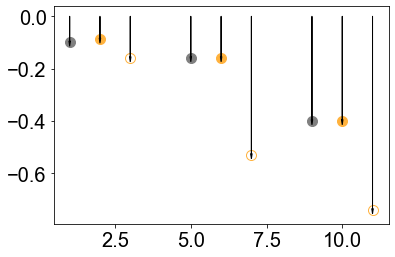

In [ ]:
numbers=[1,2,3,5,6,7,9,10,11]
ys=[ss, s2030nl, s2030l, evs, ev2030nl, ev2030l, dacs_c, dacnl_c, dacl_c]


markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']  
colors = ['grey', '#FFB23D', '#FFB23D', 'grey', '#FFB23D', '#FFB23D','grey', '#FFB23D', '#FFB23D']
fillstyles = ['grey', '#FFB23D', 'white', 'grey', '#FFB23D', 'white','grey', '#FFB23D', 'white'] 


plt.figure()

for i in range(len(ys)):
    plt.scatter(
        numbers[i], 
        ys[i], 
        color=fillstyles[i], 
        edgecolors=colors[i], 
        marker=markers[i], 
#         facecolors=colors[i] if fillstyles[i] == 'full' else 'none', 
        s=100
    )
    plt.arrow(numbers[i], 0, 0, ys[i]+0.005, head_width=0.05, head_length=0.02, fc='k', ec='k')
#     print(numbers[i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


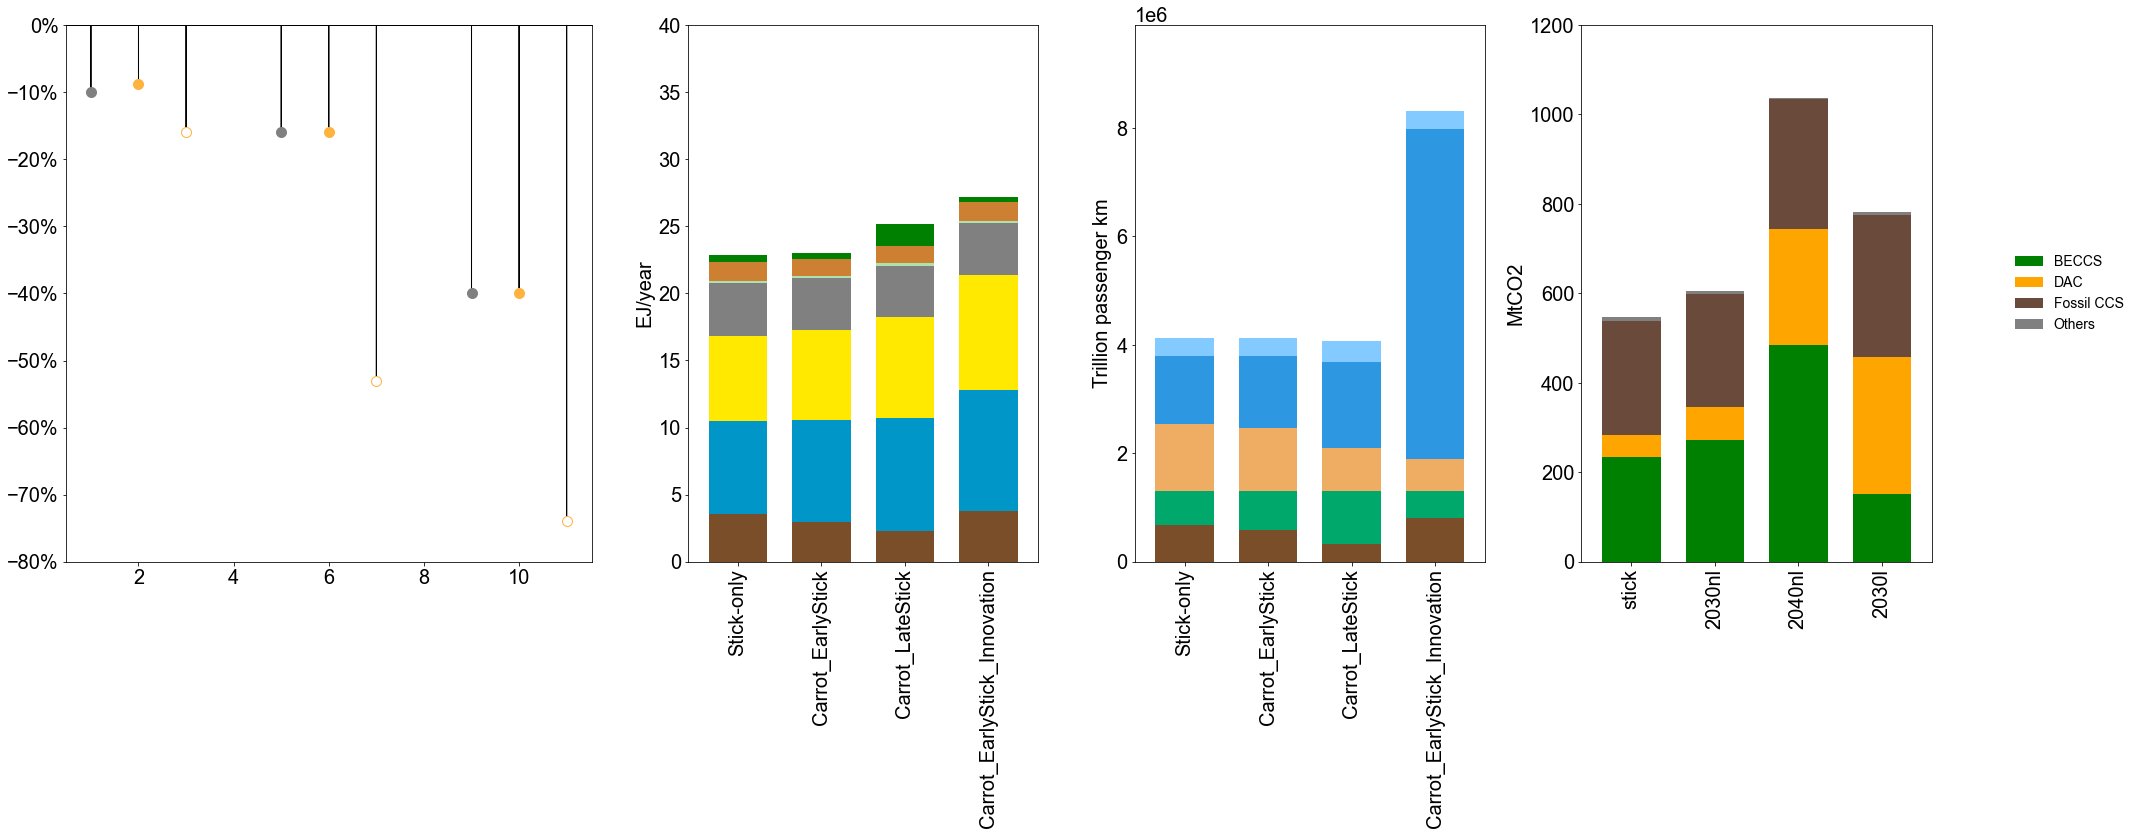

In [ ]:
# now 3 panels
import matplotlib.ticker as mticker

matplotlib.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 20
# fig, axs = plt.subplots(2, 3, figsize=(20, 6), sharey=True)
fig, axs = plt.subplots(1, 4, figsize=(30, 12), gridspec_kw={'width_ratios': [1.5, 1, 1, 1]})

# r15.plot(kind='bar', stacked=True, ax=axs[0], cmap=GEN_HL, width=0.7)
# all_df_secem.plot(kind='bar', stacked=True,  ax = axs[0], cmap=Huilin4, width=0.7)
r50.plot(kind='bar', stacked=True, ax=axs[1], cmap=GEN_HL, width=0.7)
trn_all_2050_t2.plot(kind='bar', stacked=True, ax=axs[2], cmap=GEN_HL3, width=0.7)
all_ccs3.plot(kind='bar', stacked=True, ax=axs[3],cmap=primary_cm, width=0.7)

ax0=axs[1]
ax1=axs[2]
ax2=axs[3]

ax4=axs[0]

axs[0].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

ax4.set_ylim(-0.8, 0)
ax0.set_ylim(0, 40)
ax1.set_ylim(0, 9900000)
ax2.set_ylim(0, 1200)

for i in range(len(ys)):
    ax4.arrow(numbers[i], 0, 0, ys[i]+0.005, head_width=0.05, head_length=0.01, fc='k', ec='k')
    ax4.scatter(
        numbers[i], 
        ys[i], 
#         ax=axs[0],
        color=fillstyles[i], 
        edgecolors=colors[i], 
        marker=markers[i], 

        s=100
    )

for ax in axs.flat:
    ax.legend().remove()
    ax.set_xlabel('')
    ax.axhline(y=0, color='black', linewidth=1)

axs[1].set_ylabel('EJ/year')
axs[2].set_ylabel('Trillion passenger km')
axs[3].set_ylabel('MtCO2')


axs[-1].legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False,prop={'family': 'Arial', 'size': 14},ncol=1)


plt.tight_layout()

# plt.savefig("Figure4_20240821.svg", transparent = True)


plt.show()

In [ ]:
# new figure 4 - calculating solar cost part

Solar_CC2050= 156
Solar_CC2015 = 567
Solar_CCL2050 = 125
Solar_CC_NL = (Solar_CC2050-Solar_CC2015)/Solar_CC2015
Solar_CC_L = (Solar_CCL2050-Solar_CC2015)/Solar_CC2015

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


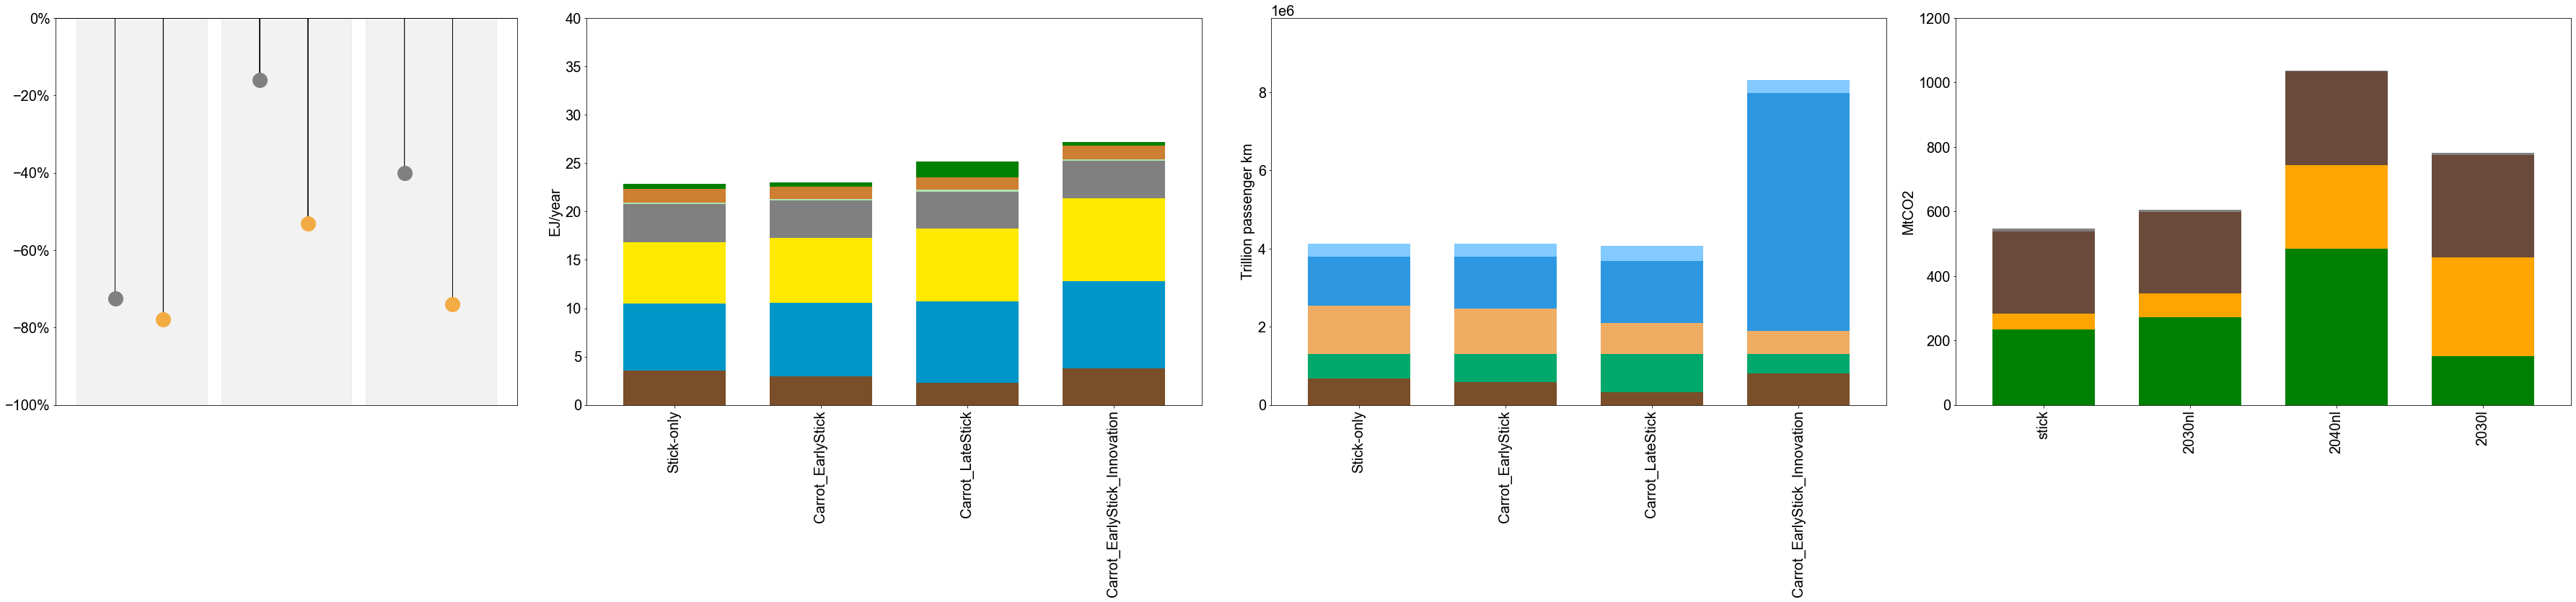

In [ ]:

ys2 = [
    Solar_CC_NL, Solar_CC_L, ys[4], ys[5], ys[7], ys[8]
]

numbers2 = [1,2,4,5,7,8]


markers2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']  
colors2 = ['grey', '#FFB23D',  'grey',  '#FFB23D','grey', '#FFB23D']
fillstyles2 = ['grey', '#FFB23D', 
               'grey', '#FFB23D',
               'grey', '#FFB23D',
              ]  



matplotlib.rcParams['font.family'] = 'Arial'

plt.rcParams['font.size'] = 20
# fig, axs = plt.subplots(2, 3, figsize=(20, 6), sharey=True)
fig, axs = plt.subplots(1, 4, figsize=(50, 12), gridspec_kw={'width_ratios': [1.5, 2, 2, 2]})

r50.plot(kind='bar', stacked=True, ax=axs[1], cmap=GEN_HL, width=0.7)
trn_all_2050_t2.plot(kind='bar', stacked=True, ax=axs[2], cmap=GEN_HL3, width=0.7)
all_ccs3.plot(kind='bar', stacked=True, ax=axs[3],cmap=primary_cm, width=0.7)

ax0=axs[1]
ax1=axs[2]
ax2=axs[3]

ax4=axs[0]


axs[0].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

ax4.set_ylim(-1, 0)
ax0.set_ylim(0, 40)
ax1.set_ylim(0, 9900000)
ax2.set_ylim(0, 1200)

for i in range(len(ys2)):
    ax4.arrow(numbers2[i], 0, 0, ys2[i]+0.005, head_width=0.05, head_length=0.01, fc='k', ec='k')
    ax4.scatter(
        numbers2[i], 
        ys2[i], 
#         ax=axs[0],
        color=fillstyles2[i], 
        edgecolors=colors2[i], 
        marker=markers2[i], 

        s=400
    )
    


for ax in axs.flat:
    ax.legend().remove()
    ax.set_xlabel('')
    ax.axhline(y=0, color='black', linewidth=1)

axs[1].set_ylabel('EJ/year')
axs[2].set_ylabel('Trillion passenger km')
axs[3].set_ylabel('MtCO2')
# axs[0].set_ylabel('Changes in 2050 costs compared with 2015')

ax4.axvspan(0.2, 2.9, color='gray', alpha=0.1)  
ax4.axvspan(3.2, 5.9, color='gray', alpha=0.1)  
ax4.axvspan(6.2, 8.9, color='gray', alpha=0.1) 

ax4.set_xticks([])
    

plt.tight_layout()

# plt.savefig("Figure4_20241007_wide.svg", transparent = True)


plt.show()

In [20]:
len(ys2)

6